***
## Quantification<a id='quantification'></a>
***
[Back to Index](#Index)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats import sem
from scipy import stats as st 
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import colorsys
import importlib
import svgutils
from svgutils.compose import *
import os.path
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import ipywidgets
from plotParams import *
import scikit_posthocs

pBGMenu = ipywidgets.Dropdown(options=['Light', 'Dark'],value='Light',disabled=False, layout=ipywidgets.Layout(width='20%', height='40px'))
pBGLabel = ipywidgets.widgets.Label('Select plotting style', layout=ipywidgets.Layout(width='20%', height='30px'))
pBG = ipywidgets.widgets.VBox([pBGLabel,pBGMenu])
pBG

### Read csv created during analysis and create bar plot

In [2]:
baseColor = applyPlotStyle(pBGMenu.value)

#gene of interest
# goi = 'tbx2aF3_nr2e3F0'
goi = 'F0CRXTbx2a'


if goi == 'nr2e3':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRnr2e3F0s/"
    fName = "CRnr2e3F0s_counts.csv"
    geneList = ['wt','nr2e3']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'foxq2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRfoxq2F0/"
    fName = "CRfoxq2F0_counts.csv"
    geneList = ['wt','foxq2']
    photoreceptors = ['R','U','S','M','L']
elif goi == 'skor1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRskor1aF0s/"
    fName = "CRskor1aF0_counts.csv"
    geneList = ['wt','skor1a']
    photoreceptors = ['U','S']
elif goi == 'sall1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRsall1aF0s/"
    fName = "CRsall1aF0_counts.csv"
    geneList = ['wt','sall1a']
    photoreceptors = ['R']
elif goi == 'xbp1':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRxbp1F0s/"
    fName = "CRxbp1F0_counts.csv"
    geneList = ['wt','xbp1']
    photoreceptors = ['R','U','S','M']
elif goi == 'lrrfip1a':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRlrrfip1aF0s/"
    fName = "CRlrrfip1aF0s_counts.csv"
    geneList = ['wt','lrrfip1a']
    photoreceptors = ['R','U','S','M']
    photoreceptors = ['S','M']
elif goi == 'tbx2':
    dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRtbx2F0s/"
    fName = "CRtbx2F0s_combinedCounts.csv"
    geneList = ['wt','tbx2a','tbx2b']
    photoreceptors = ['R','U','S','M','L']
    # photoreceptors = ['R','U']
elif goi == 'tbx2aF3_nr2e3F0':
    dPath = "G:/Shared drives/vldImaging/Analysis/"
    fName = "CombinedTbx2Counts.csv"
    geneList = [
        'tbx2a_F0 / nr2e3 wt',
        'tbx2a_F0 / nr2e3 F0',
        'tbx2a_het / nr2e3 wt',
        'tbx2a_het / nr2e3 F0',
        'tbx2a_KO / nr2e3 wt',
        'tbx2a_KO / nr2e3 F0',
        'tbx2b_F0 / nr2e3 wt',
        'tbx2b_F0 / nr2e3 F0',
        'tbx2b_het / nr2e3 wt',
        'tbx2b_het / nr2e3 F0',
        'tbx2b_KO / nr2e3 wt',
        'tbx2b_KO / nr2e3 F0',
        'tbx2b_wt / nr2e3 wt',
        'tbx2b_wt / nr2e3 F0',
        'tbx2a_wt / nr2e3 wt',
        'tbx2a_wt / nr2e3 F0',
               ]
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
elif goi == 'tbx2F3':
    dPath = "G:/Shared drives/vldImaging/Analysis/"
    fName = "CombinedTbx2Counts.csv"
    geneList = ['tbx2a_KO','tbx2a_wt','tbx2b_KO']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['U']
elif goi == 'tbx2bF3_nr2e3F0':
    dPath = "G:/Shared drives/vldImaging/Analysis/F3tbx2bF0nr2e3/"
    fName = "F3tbx2b_F0nr2e3_counts_20230527.csv"
    geneList = ['wt','tbx2','nr2e3']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
elif goi == 'tbx2aF3':
    dPath = "G:/Shared drives/vldImaging/Analysis/F3tbx2a/"
    fName = "F3tbx2a_counts_20230601.csv"
    geneList = ['wt','tbx2']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
elif goi == 'tbx2bF3':
    dPath = "G:/Shared drives/vldImaging/Analysis/F3tbx2b/"
    fName = "F3tbx2b_counts_20230604.csv"
    geneList = ['wt','tbx2']
    # photoreceptors = ['R','U','S','M','L']
    photoreceptors = ['R','U']
elif goi == 'F0tbx2aSWAP':
    dPath = "E:/Analysis/"
    fName = "F0Tbx2aSWAP_counts.csv"
    geneList = ['wt','tbx2a_nalou','tbx2a_fou']
    photoreceptors = ['R','U']
elif goi == 'F0tbx2aSWAP_RESCUE':
    dPath = "D:/Analysis/"
    fName = "F0Tbx2aRESCUE_SWAP_combinedcounts.csv"
    geneList = ['wt','tbx2a_nalou','tbx2a_fou']
    photoreceptors = ['R','U']
elif goi == 'F0CRXTbx2b':
    dPath = "D:/Analysis/20250130_F0CRXTbx2b_s1CxOG/"
    fName = "F0CRX2b_combinedcounts.csv"
    geneList = ['wt','tbx2ainj','tbx2binj']
    photoreceptors = ['R','U']
elif goi == 'F0CRXTbx2a':
    dPath = "D:/Analysis/20250227_F0CRXTbx2a_s1c_xOG/"
    fName = "20250227_F0CRXTbx2a_s1CxOG_counts.csv"
    geneList = ['wt','tbx2a_3d','tbx2a_5d']
    photoreceptors = ['R','U']
    
elif goi == '':
    dPath = "zzzzzzz"
    fName = "zzzzz.csv"
    geneList = ['wt','zzzzz']
    photoreceptors = ['R','U','S','M','L']


df = pd.read_csv(dPath + fName)
df.head(5)

Plotting style is Dark


,filename,R,U,S,M,L,nU,nL,H1,H2/3,analysisFlags,genotypingFlag,Tbx2,Injected,notes
0,20250227_3dpf_s1C_xOG_uninj_L01_002,58.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,tbx2a_3,WT,noteshere
1,20250227_3dpf_s1C_xOG_uninj_L02_002,61.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,tbx2a_3,WT,noteshere
2,20250227_3dpf_s1C_xOG_uninj_L02_004,72.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,tbx2a_3,WT,noteshere
3,20250227_3dpf_s1C_xOG_uninj_L03_002,70.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,tbx2a_3,WT,noteshere
4,20250227_3dpf_s1C_xOG_uninj_L04_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,tbx2a_3,WT,Omit - the zoom in is too curved


## Standard plots (most genes)

In [ ]:
geneList = ['tbx2a']
nGenes = np.size(geneList)

# photoreceptors = ['R','U','S','M','L']
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [2.4*np.size(photoreceptors),8])

barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['genotype']==gene) & (df['excludeFlag']==False)][pr]
        jitter = np.random.randn(len(countData))*0.01
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
axH.set_ylim([0,500]); # tbx2



# savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/"

# savePath = 'C:/Users/pataklk/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/'
# plt.savefig(savePath + geneList[1] + "_counts.svg", transparent=True, format="svg", bbox_inches = "tight")

In [ ]:
#Carinna's attempt to separate tbx2 and nr2e3 nested in for loops
# Nested Tbx2 and nr2e3 screen
nGenes = np.size(geneList)

fH, axH = plt.subplots(figsize=[16,8])

# tbx2g = ['tbx2a_F0','tbx2a_het','tbx2a_KO','tbx2b_F0','tbx2b_het','tbx2b_KO','tbx2a_wt','tbx2b_wt']
tbx2g = ['tbx2a_wt', 'tbx2a_F0','tbx2b_F0']
# tbx2g = ['tbx2a_KO','tbx2a_wt','tbx2b_wt','tbx2b_KO']

nr2g = ['wt']
# nr2g = ['wt','F0']

barStep = 3; # distance between photoreceptor groups
barW =0.9; # bar width
barD1 = 1.5; # bar distance within nr2e3 division
barD2 = 0.5; # bar distance within tbx2 division
barP = 1; # position in x-axis
barPos = []; #array to save bar positions


thisbarPos = barP; #starting position
for pr in photoreceptors:
    for a in tbx2g:  #to separate tbx2 conditions 
        for b in nr2g:  #separate out nr2e3 conditions
            countData = df[(df['tbx2']== a) & (df['nr2e3']== b) & (df['excludeFlag']==False)][pr]
            jitter = np.random.randn(len(countData))*0.05
            textindent = 0.10;
            pH = plt.bar([thisbarPos], np.mean(countData), width=barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
            pH = plt.errorbar(thisbarPos, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
            pH = plt.scatter(np.ones(len(countData))*[thisbarPos]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
            barPos = np.append(barPos,(thisbarPos))
            thisbarPos = thisbarPos + barD1 # updating bar position for next item in nr2e3 for loop
        thisbarPos = thisbarPos + barD2  # updating bar position for next item in tbx2 for loop
    thisbarPos = thisbarPos + barStep; # updating bar position for next item in photoreceptors for loop

xLabels = [ 'Wildtype', 'tbx2a F0',
        'tbx2b F0']
    
formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));
axH.set_xticklabels(xLabels * len(photoreceptors), ha='right', rotation_mode='anchor');

# xLabels = geneList
    # 'Tbx2a_F0','Tbx2a_wt','Tbx2b_wt','Tbx2b_F0']

axH.set_ylim([0,200]); # cone default (to have space for significance stars

# axH.set_ylim([0,80]); # for rods only

# axH.set_ylim([0,250]); # tbx2 
# axH.set_xlim([0,np.max(barPos)+1]); # tbx2 


## Plots for tbx2 figures

In [ ]:
# tbx2UV = ['tbx2a_wt', 'tbx2b_wt']
# tbx2r = ['tbx2a_wt', 'tbx2b_wt']
geneList = ['tbx2a_wt', 'tbx2b_wt']
nGenes = np.size(geneList)
photoreceptors = ['U','R']

    
# countData = df.groupby('tbx2UV')[pr](df['excludeFlag']==False).count()

for gene in geneList:
    for pr in photoreceptors:
        countData = df[(df['tbx2']==gene) & (df['excludeFlag']==False)][pr]

        print()

# Working Nested TBX2 for loops

Text(0, 0.5, 'cells per 80 x 80 $\\mu$m$^2$')

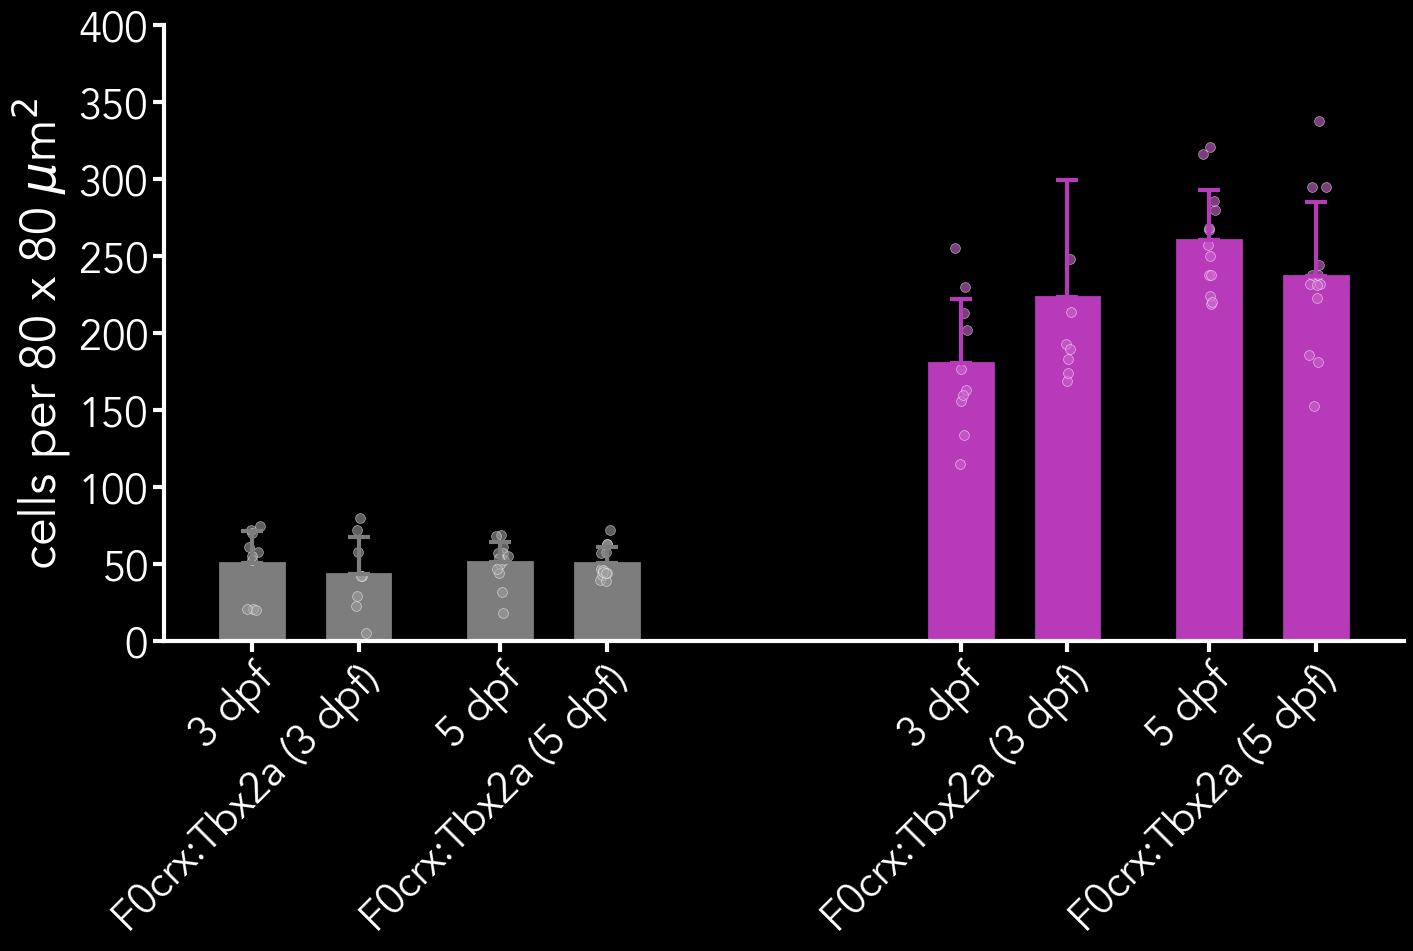

In [4]:
#Carinna's attempt to separate tbx2a and injected nested in for loops
# Nested Tbx2 and nr2e3 screen
nGenes = np.size(geneList)

fH, axH = plt.subplots(figsize=[16,8])

tbx2g = ['tbx2a_3', 'tbx2a_5']
# tbx2g = ['tbx2a_F0','tbx2a_het','tbx2a_KO','tbx2b_F0','tbx2b_het','tbx2b_KO','tbx2a_wt','tbx2b_wt']
# tbx2g = ['tbx2a_fou', 'tbx2a_nalou']
# tbx2g = ['tbx2a_KO','tbx2a_wt','tbx2b_wt','tbx2b_KO']

# injectedg = ['uninj', 'SWAP', 'RESCUE']
# injectedg = ['uninj', 'SWAP', 'RESCUE', 'inj2bSWAP']
# injectedg = ['uninj', 'RESCUE']
# injectedg = ['uninj', 'SWAP']
# nr2g = ['wt','F0']
injectedg = ['WT', 'F0CRX2a']

barStep = 3; # distance between photoreceptor groups
barW =0.9; # bar width
barD1 = 1.5; # bar distance within nr2e3 division
barD2 = 0.5; # bar distance within tbx2 division
barP = 1; # position in x-axis
barPos = []; #array to save bar positions


thisbarPos = barP; #starting position
for pr in photoreceptors:
    for a in tbx2g:  #to separate tbx2 conditions 
        for b in injectedg:  #separate out nr2e3 conditions
            countData = df[(df['Tbx2']== a) & (df['Injected']== b)][pr]
            jitter = np.random.randn(len(countData))*0.05
            textindent = 0.10;
            pH = plt.bar([thisbarPos], np.mean(countData), width=barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
            pH = plt.errorbar(thisbarPos, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
            pH = plt.scatter(np.ones(len(countData))*[thisbarPos]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
            barPos = np.append(barPos,(thisbarPos))
            thisbarPos = thisbarPos + barD1 # updating bar position for next item in nr2e3 for loop
        thisbarPos = thisbarPos + barD2  # updating bar position for next item in tbx2 for loop
    thisbarPos = thisbarPos + barStep; # updating bar position for next item in photoreceptors for loop
    
#     # RESCUE &  2A:2B SWAP
# xLabels = [ 'tbx2a FOU uninj',
#            'tbx2a FOU SWAP',
#             'tbx2a FOU RESCUE',
#           'tbx2a nalou uninj',
#            'tbx2a nalou SWAP', 
#           'tbx2a nalou RESCUE' ] 
    
#     RESCUE &  BOTH SWAP
# xLabels = [ 'tbx2a FOU uninj',
#            'tbx2a FOU SWAP',
#             'tbx2a FOU RESCUE',
#            'tbx2a FOU SWAP (2B:2A)',
#           'tbx2a nalou uninj',
#            'tbx2a nalou SWAP', 
#           'tbx2a nalou RESCUE',
#           'tbx2a nalou SWAP (2B:2A)']        
    
# #RESCUE BY ITSELF
# xLabels = [ 'tbx2a FOU uninj',
#            'tbx2a FOU RESCUE',
#           'tbx2a nalou uninj', 
#           'tbx2a nalou RESCUE' ]

# # SWAP BY ITSELF
# xLabels = [ 'tbx2a FOU uninj',
#         'tbx2a FOU SWAP',
#           'tbx2a nalou uninj',
#           'tbx2a nalou SWAP', ]

#OVEREXPRESSION OF TBX2
xLabels = [ '3 dpf','F0crx:Tbx2a (3 dpf)','5 dpf',
          'F0crx:Tbx2a (5 dpf)' ]
    
formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));
axH.set_xticklabels(xLabels * len(photoreceptors), ha='right', rotation_mode='anchor');

# xLabels = geneList
    # 'Tbx2a_F0','Tbx2a_wt','Tbx2b_wt','Tbx2b_F0']

axH.set_ylim([0,400]); # cone default (to have space for significance stars

plt.ylabel('cells per 80 x 80 $\mu$m$^2$')
# axH.set_ylim([0,80]); # for rods only

# axH.set_ylim([0,250]); # tbx2 
# axH.set_xlim([0,np.max(barPos)+1]); # tbx2 

In [ ]:
barPos

In [ ]:
geneList = ['tbx2a_KO','tbx2a_wt','tbx2b_KO']
tbx2g = ['tbx2a_3', 'tbx2a_5']
nGenes = np.size(geneList)
photoreceptors = ['U']

# photoreceptors = ['R','U','S','M','L']


plotname = ''
fH, axH = plt.subplots(figsize= [6,12])

#tweaking bar position and width
barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['tbx2']==gene) & (df['excludeFlag']==False)][pr]
        jitter = np.random.randn(len(countData))*0.01
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

# xLabels = geneList
xLabels = ['Tbx2a KO', 'Wildtype', 'Tbx2b KO']
axH.set_xticklabels(xLabels * len(photoreceptors), ha='right', rotation_mode='anchor');
axH.xaxis.set_tick_params(rotation=45)
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
axH.set_ylim([0,200]); # tbx2

# savePath = 'C:/Users/pataklk/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/'
# savePath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Manuscripts/2021_zfConeRNAseq/newGeneFigures/tbx2/"
# plt.savefig(savePath + "tbx2_RUcounts.svg", transparent=True, format="svg", bbox_inches = "tight")

## Stats

In [6]:
geneList = ['tbx2a_3','tbx2a_5']


tbx2g = ['tbx2a_3', 'tbx2a_5']
injectedg = ['WT', 'F0CRX2a']


print('{0} vs. {1}:'.format(geneList[0],geneList[1]))


for pr in photoreceptors:
    for a in tbx2g:  #to separate tbx2 conditions 
        for b in nr2g:  #separate out nr2e3 conditions
            countData = df[(df['Tbx2']== a) & (df['Injected']== b) & (df['excludeFlag']==False)][pr]
            countData = countData[~np.isnan(countData)]
            
# for pr in photoreceptors:
#     # get counts for each photoreceptor subtype and exclude NaNs
#     wtCount = df[(df['genotype']==(geneList[0]))&(df['excludeFlag']==False)][pr]
#     wtCount = wtCount[~np.isnan(wtCount)]
 
    
print(np.mean(countData)
    
#     crCount = df[(df['genotype']==(geneList[1]))&(df['excludeFlag']==False)][pr]
#     crCount = crCount[~np.isnan(crCount)]
    
#     u, p = mannwhitneyu(wtCount, crCount)
#     print('\t{0}:\t{1} % change'.format(pr,100*(np.mean(crCount)-np.mean(wtCount))/np.mean(wtCount)))
#     print('\t{0}:\t{1}-fold change'.format(pr,(np.mean(crCount))/np.mean(wtCount)))
#     print('\t\tU = {0:.3f}, p = {1:.10f}, nEyes: wt = {2:.0f}; cr = {3:.0f}'.format(u,p,len(wtCount),len(crCount)))


SyntaxError: unexpected EOF while parsing (2700179104.py, line 25)

## Correlations

#### F&empty;[_tbx2_]

In [ ]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]

geneList = ['wt','tbx2a','tbx2b']

nGenes = np.size(geneList)
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [9,8])


for gene,geneColor,geneMarker in zip(geneList,['#000000','#616161','#ab266b'],['o','*','^']):
    countA = cdf[(cdf['genotype']==gene)][photoreceptors[0]]
    countB = cdf[(cdf['genotype']==gene)][photoreceptors[1]]
    pH = plt.scatter(countA, countB,
             color=geneColor, zorder=8, marker = geneMarker, s=100, edgecolor=baseColor, linewidth=0.5, alpha = 1, label = gene);


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xlabel('Rods', fontproperties=fontLabels)
axH.set_ylabel('UV cones', fontproperties=fontLabels)
# axH.set_xlim([-5,80]); # tbx2
# axH.set_ylim([-5,180]); # tbx2
axH.legend()


#### F3[_tbx2a_] & F&empty;[_nr2e3_]

In [ ]:
cdf = df[(~np.isnan(df['R'].values)&~np.isnan(df['U'].values))]
cdf = cdf[cdf['excludeFlag']==0]
cdf[cdf['tbx2a']=='++']

geneListA = ['++','+-','--']
# geneListA = ['++','+-']
geneListB = ['wt','nr2e3']
# geneListB = ['wt']

nGenes = np.size(geneListA) * np.size(geneListB)
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize= [9,8])


for geneA,colorA in zip(geneListA,['#000000','#616161','#ab266b']):
    for geneB,markerB in zip(geneListB,['o','*']):
        countA = cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)][photoreceptors[0]]
        countB = cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)][photoreceptors[1]]
        pH = plt.scatter(countA, countB,
                 color=colorA, zorder=8, marker = markerB, s=100, edgecolor=baseColor, linewidth=0.5, alpha = 1, label = 'tbx2a'+geneA+' '+geneB);


fontLabels = formatFigureMain(fH, axH, pH)
axH.set_xlabel('Rods', fontproperties=fontLabels)
axH.set_ylabel('UV cones', fontproperties=fontLabels)
axH.set_xlim([-5,80]); # tbx2
axH.set_ylim([-5,180]); # tbx2
axH.legend()

# axH.set_xticks(np.sort(barPos));

# axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,80]); # for rods only
# axH.set_ylim([0,350]); # cone default (to have space for significance stars
# axH.set_ylim([0,500]); # tbx2


In [ ]:
cdf[(cdf['tbx2a']==geneA) & (cdf['genotype']==geneB)]

### Juan's attempt at making 4 bars

In [ ]:
#Carinna's attempt to separate tbx2 and nr2e3 nested in for loops
photoreceptors = ['U', 'R']
nGenes = np.size(geneList)

fH, axH = plt.subplots(figsize=[16,8])

# tbx2g = ['tbx2a_F0','tbx2a_het','tbx2a_KO','tbx2b_F0','tbx2b_het','tbx2b_KO','tbx2a_wt','tbx2b_wt']
tbx2g = ['tbx2a_wt', 'tbx2a_KO','tbx2b_KO']
# tbx2g = ['tbx2a_KO','tbx2a_wt','tbx2b_wt','tbx2b_KO']

nr2g = ['F0']
# nr2g = ['wt','F0']

barStep = 3; # distance between photoreceptor groups
barW =0.9; # bar width
barD1 = 1.5; # bar distance within nr2e3 division
barD2 = 0.5; # bar distance within tbx2 division
barP = 1; # position in x-axis
barPos = []; #array to save bar positions


thisbarPos = barP; #starting position
for pr in photoreceptors:
    # countData = df[(df['tbx2']== 'tbx2a_wt') | (df['tbx2']== 'tbx2b_wt') & (df['nr2e3']== 'wt') & (df['excludeFlag']==False)][pr]
    countData = df[(df['tbx2']== 'tbx2a_wt') & (df['nr2e3']== 'wt') & (df['excludeFlag']==False)][pr]
    jitter = np.random.randn(len(countData))*0.05
    textindent = 0.10;
    pH = plt.bar([thisbarPos], np.mean(countData), width=barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], #bar is avg
    pH = plt.errorbar(thisbarPos, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9) #error bar
    pH = plt.scatter(np.ones(len(countData))*[thisbarPos]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
    barPos = np.append(barPos,(thisbarPos))
    thisbarPos = thisbarPos + barD1 # updating bar position for next item in nr2e3 for loop
    thisbarPos = thisbarPos + barD2  # updating bar position for next item in tbx2 for loop
    for a in tbx2g:  #to separate tbx2 conditions 
        for b in nr2g:  #separate out nr2e3 conditions
            countData = df[(df['tbx2']== a) & (df['nr2e3']== b) & (df['excludeFlag']==False)][pr]
            jitter = np.random.randn(len(countData))*0.05
            textindent = 0.10;
            pH = plt.bar([thisbarPos], np.mean(countData), width=barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
            pH = plt.errorbar(thisbarPos, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
            pH = plt.scatter(np.ones(len(countData))*[thisbarPos]+jitter, countData, color=lighten_color(zfC[pr],.75), zorder=8, marker = 'o', s=50, edgecolor=baseColor, linewidth=0.5, alpha = .6);
            barPos = np.append(barPos,(thisbarPos))
            thisbarPos = thisbarPos + barD1 # updating bar position for next item in nr2e3 for loop
        thisbarPos = thisbarPos + barD2  # updating bar position for next item in tbx2 for loop
    thisbarPos = thisbarPos + barStep; # updating bar position for next item in photoreceptors for loop

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

# xLabels = geneList
xLabels = [ 'wildtype', 'nr2e3 F0',
        'tbx2a KO + nr2e3 F0',
        'tbx2b KO + nr2e3 F0']
    # 'Tbx2a_F0','Tbx2a_wt','Tbx2b_wt','Tbx2b_F0']
axH.set_xticklabels(xLabels * len(photoreceptors), ha='right', rotation_mode='anchor');

axH.set_ylim([0,200]); # cone default (to have space for significance stars

# axH.set_xticklabels(geneList * len(photoreceptors));
# axH.xaxis.set_tick_params(rotation=90)
# axH.set_ylim([0,80]); # for rods only

# axH.set_ylim([0,250]); # tbx2 
# axH.set_xlim([0,np.max(barPos)+1]); # tbx2 

In [ ]:
#Reporting (N) Counts for UV and R in different conditions:
# geneList = ['tbx2a_wt','tbx2b_wt']
print('Carinna writing code!!!!')

tbx2g = ['tbx2a_KO','tbx2b_KO','tbx2a_wt']
nr2g = ['F0'] 

for pr in photoreceptors:
    for a in tbx2g:  #to separate tbx2 conditions 
        for b in nr2g:  #separate out nr2e3 conditions
            countData = df[(df['tbx2']== a) & (df['nr2e3']== b) & (df['excludeFlag']==False)][pr]
            countData = countData[~np.isnan(countData)]
            print('For {0}, {1}, {2}: n={3}'.format(pr,a,b,len(countData)))

# Statistical Analysis of nr2e3 & Tbx2 Screen 

In [ ]:
# Statistical Analysis of nr2e3 & tbx2 screen

# geneList = ['wt','tbx2a','tbx2b']



tbx2g = ['tbx2a_wt','tbx2a_F0','tbx2b_F0','tbx2a_KO','tbx2b_KO']
nr2g = ['wt','F0'] 
# print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    wtCount = df[(df['tbx2']==(tbx2g[0]))&(df['nr2e3']==(nr2g[0]))&(df['excludeFlag']==False)][pr]
    wtCount = wtCount[~np.isnan(wtCount)]
    
    tbx2aF0Count = df[(df['tbx2']==(tbx2g[1]))&(df['nr2e3']==(nr2g[0]))&(df['excludeFlag']==False)][pr]
    tbx2aF0Count = tbx2aF0Count[~np.isnan(tbx2aF0Count)]
    
    tbx2bF0Count = df[(df['tbx2']==(tbx2g[2]))&(df['nr2e3']==(nr2g[0]))&(df['excludeFlag']==False)][pr]
    tbx2bF0Count = tbx2bF0Count[~np.isnan(tbx2bF0Count)]
    
    tbx2aKOCount = df[(df['tbx2']==(tbx2g[3]))&(df['nr2e3']==(nr2g[0]))&(df['excludeFlag']==False)][pr]
    tbx2aKOCount = tbx2aKOCount[~np.isnan(tbx2aKOCount)]
    
    tbx2bKOCount = df[(df['tbx2']==(tbx2g[4]))&(df['nr2e3']==(nr2g[0]))&(df['excludeFlag']==False)][pr]
    tbx2bKOCount = tbx2bKOCount[~np.isnan(tbx2bKOCount)]
    
    #nr2e3Screen
    Nr2e3F0Count = df[(df['tbx2']==(tbx2g[0]))&(df['nr2e3']==(nr2g[1]))&(df['excludeFlag']==False)][pr]
    Nr2e3F0Count = Nr2e3F0Count[~np.isnan(Nr2e3F0Count)]
    
    tbx2aKOnr2Count = df[(df['tbx2']==(tbx2g[3]))&(df['nr2e3']==(nr2g[1]))&(df['excludeFlag']==False)][pr]
    tbx2aKOnr2Count = tbx2aKOnr2Count[~np.isnan(tbx2aKOnr2Count)]
    
    tbx2bKOnr2Count = df[(df['tbx2']==(tbx2g[4]))&(df['nr2e3']==(nr2g[1]))&(df['excludeFlag']==False)][pr]
    tbx2bKOnr2Count = tbx2bKOnr2Count[~np.isnan(tbx2bKOnr2Count)]
    
    h, p = kruskal(wtCount, tbx2aF0Count, tbx2bF0Count, tbx2aKOCount, tbx2bKOCount, Nr2e3F0Count, tbx2aKOnr2Count, tbx2bKOnr2Count)
#     print('\t{0}:\t{1:.2f} % change for {2}'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount),geneList[1]))
#     print('\t{0}:\t{1:.4f}-fold change for {2}'.format(pr,(np.mean(aCount))/np.mean(wtCount),geneList[1]))
#     print('\t{0}:\t{1:.4f} absolute change for {2}\n'.format(pr,(np.mean(aCount))-np.mean(wtCount),geneList[1]))
#     print('\t{0}:\t{1:.2f} % change for {2}'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount),geneList[2]))
#     print('\t{0}:\t{1:.4f}-fold change for {2}'.format(pr,(np.mean(bCount))/np.mean(wtCount),geneList[2]))
#     print('\t{0}:\t{1:.4f} absolute change for {2}\n'.format(pr,(np.mean(bCount))-np.mean(wtCount),geneList[2]))
#     print('\t\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(h,p,len(wtCount),geneList[1],len(aCount),geneList[2],len(bCount)))
    
    posthoc_names = ['wtCount', 'tbx2aF0Count', 'tbx2bF0Count', 'tbx2aKOCount', 'tbx2bKOCount', 'Nr2e3F0Count', 'tbx2aKOnr2Count', 'tbx2bKOnr2Count']
    r = scikit_posthocs.posthoc_conover([wtCount, tbx2aF0Count, tbx2bF0Count, tbx2aKOCount, tbx2bKOCount, Nr2e3F0Count, tbx2aKOnr2Count, tbx2bKOnr2Count], p_adjust='Bonferroni') #bonferroni used to correct for Faimly-wise Error Rate (FWER)
    # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    print('For {0}'.format(pr))
    print('\tConover-Iman posthoc + Bonferroni p adjustment:')
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[1],r.iloc[0,1]))
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[2],r.iloc[0,2]))
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[1],r.iloc[0,3]))
    # print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(tbx2g[1],tbx2g[2],r.iloc[1,2]))
    if pr=='R':
        rRods = r
    elif pr=='U':
        rUV = r
    # #tbx2KO comparisons 
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[1],r.iloc[0,1]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[2],r.iloc[0,2]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[3],r.iloc[0,3]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[4],r.iloc[0,4]))
    
    
    #tbx2KO + nr2e3 comparisons 
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[3],r.iloc[5,7]))
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[4],r.iloc[0,2])) 
    
    
    # r = scikit_posthocs.posthoc_dunn([wtCount, aCount, bCount], p_adjust='Bonferroni')
    # # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    # print('\t\tDunn posthoc + Bonferroni p adjustment:')
    # print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
    # print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
    # print('\t\t\t{0} vs. {1}: p = {2:.20f} | p = {2}\n'.format(geneList[1],geneList[2],r.iloc[1,2]))

# Statistical Analysis of Tbx2a Overexpression

In [19]:
# Statistical Analysis of TBX2A overexpression 
tbx2g = ['tbx2a_3', 'tbx2a_5']
nr2g = ['WT', 'F0CRX2a']


# tbx2g = ['tbx2a_wt','tbx2a_F0','tbx2b_F0','tbx2a_KO','tbx2b_KO']
# nr2g = ['wt','F0'] 
# print('{0} vs. {1}:'.format(geneList[0],geneList[1]))

for pr in photoreceptors:
    # get counts for each photoreceptor subtype and exclude NaNs
    
    #Uninjected
    wt3Count = df[(df['Tbx2']==(tbx2g[0]))&(df['Injected']==(nr2g[0]))&(df['genotypingFlag']==False)][pr] #3 day WT counts 
    wt3Count = wt3Count[~np.isnan(wt3Count)]
    
    wt5Count = df[(df['Tbx2']==(tbx2g[1]))&(df['Injected']==(nr2g[0]))&(df['genotypingFlag']==False)][pr] #5 day  WT counts 
    wt5Count = wt5Count[~np.isnan(wt5Count)]
    
    
    #Injected
    tbx2a3Count = df[(df['Tbx2']==(tbx2g[0]))&(df['Injected']==(nr2g[1]))&(df['genotypingFlag']==False)][pr] ##3 day injected counts 
    tbx2a3Count = tbx2a3Count[~np.isnan(tbx2a3Count)]
    
    tbx2a5Count = df[(df['Tbx2']==(tbx2g[1]))&(df['Injected']==(nr2g[1]))&(df['genotypingFlag']==False)][pr] #5 day injected counts 
    tbx2a5Count = tbx2a5Count[~np.isnan(tbx2a5Count)]
    
    
    h, p = kruskal(wt3Count, wt5Count, tbx2a3Count, tbx2a5Count)
#     print('\t{0}:\t{1:.2f} % change for {2}'.format(pr,100*(np.mean(aCount)-np.mean(wtCount))/np.mean(wtCount),geneList[1]))
#     print('\t{0}:\t{1:.4f}-fold change for {2}'.format(pr,(np.mean(aCount))/np.mean(wtCount),geneList[1]))
#     print('\t{0}:\t{1:.4f} absolute change for {2}\n'.format(pr,(np.mean(aCount))-np.mean(wtCount),geneList[1]))
#     print('\t{0}:\t{1:.2f} % change for {2}'.format(pr,100*(np.mean(bCount)-np.mean(wtCount))/np.mean(wtCount),geneList[2]))
#     print('\t{0}:\t{1:.4f}-fold change for {2}'.format(pr,(np.mean(bCount))/np.mean(wtCount),geneList[2]))
#     print('\t{0}:\t{1:.4f} absolute change for {2}\n'.format(pr,(np.mean(bCount))-np.mean(wtCount),geneList[2]))
#     print('\t\tH = {0:.3f}, p = {1:.20f}, nEyes: wt = {2:.0f}; {3} = {4:.0f}; {5} = {6:.0f}'.format(h,p,len(wtCount),geneList[1],len(aCount),geneList[2],len(bCount)))
    
    posthoc_names = ['wt3Count', 'wt5Count', 'tbx2a3Count', 'tbx2a5Count']
    r = scikit_posthocs.posthoc_conover([wt3Count, wt5Count, tbx2a3Count, tbx2a5Count], p_adjust='Bonferroni') #bonferroni used to correct for Faimly-wise Error Rate (FWER)
    # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    print('For {0}'.format(pr))
    print('\tConover-Iman posthoc + Bonferroni p adjustment:')
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[1],r.iloc[0,1]))
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[2],r.iloc[0,2]))
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[1],r.iloc[0,3]))
    # print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(tbx2g[1],tbx2g[2],r.iloc[1,2]))
    if pr=='R':
        rR = r
    elif pr=='U':
        rU = r
    # #tbx2KO comparisons 
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[1],r.iloc[0,1]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[2],r.iloc[0,2]))
    print('\t\t{0} vs. {1}: p = {2:.20f} | p = {2}'.format(posthoc_names[0],posthoc_names[3],r.iloc[0,3]))
    
    
    #tbx2KO + nr2e3 comparisons 
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[3],r.iloc[5,7]))
    # print('\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(tbx2g[4],r.iloc[0,2])) 
    
    
    # r = scikit_posthocs.posthoc_dunn([wtCount, aCount, bCount], p_adjust='Bonferroni')
    # # r = scikit_posthocs.posthoc_conover([wtCount, aCount, bCount])
    # print('\t\tDunn posthoc + Bonferroni p adjustment:')
    # print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[1],r.iloc[0,1]))
    # print('\t\t\twt vs. {0}: p = {1:.20f} | p = {1}'.format(geneList[2],r.iloc[0,2]))
    # print('\t\t\t{0} vs. {1}: p = {2:.20f} | p = {2}\n'.format(geneList[1],geneList[2],r.iloc[1,2]))


For R
	Conover-Iman posthoc + Bonferroni p adjustment:
		wt3Count vs. wt5Count: p = 1.00000000000000000000 | p = 1.0
		wt3Count vs. tbx2a3Count: p = 1.00000000000000000000 | p = 1.0
		wt3Count vs. tbx2a5Count: p = 1.00000000000000000000 | p = 1.0
For U
	Conover-Iman posthoc + Bonferroni p adjustment:
		wt3Count vs. wt5Count: p = 0.00080677156265569240 | p = 0.0008067715626556924
		wt3Count vs. tbx2a3Count: p = 1.00000000000000000000 | p = 1.0
		wt3Count vs. tbx2a5Count: p = 0.02513052461320979675 | p = 0.025130524613209797


In [14]:
r.loc?

Type:        property
String form: <property object at 0x000002D0F7F995E0>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- An alignable boolean Series. The index of the key will be aligned before
  masking.
- An alignable Index. The Index of the returned selection will be the input.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output f